In [ ]:
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/karakaggle/kaggle-cat-vs-dog-dataset")

In [17]:
pip install tensorflow==2.12 tensorflow-addons[tensorflow]

In [18]:
!pip install opendatasets
!pip install pandas
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/karakaggle/kaggle-cat-vs-dog-dataset")

Skipping, found downloaded files in "./kaggle-cat-vs-dog-dataset" (use force=True to force download)


In [19]:
!pip install tf-keras-vis

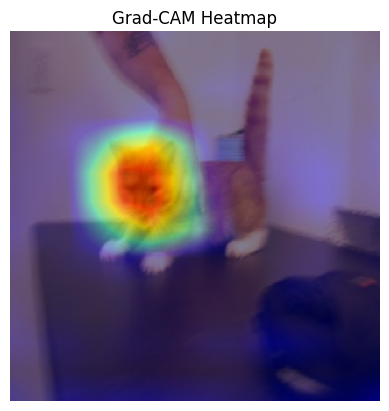

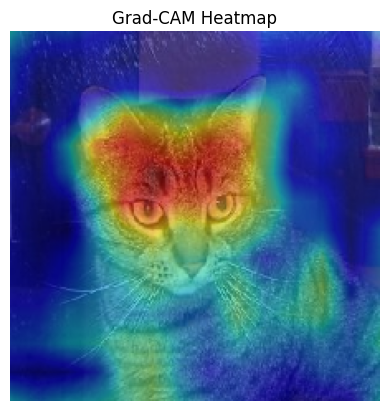

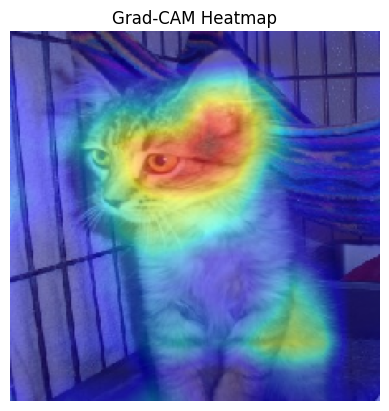

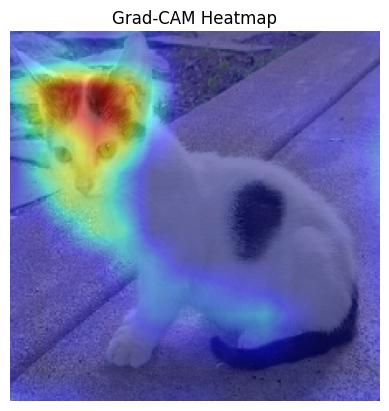

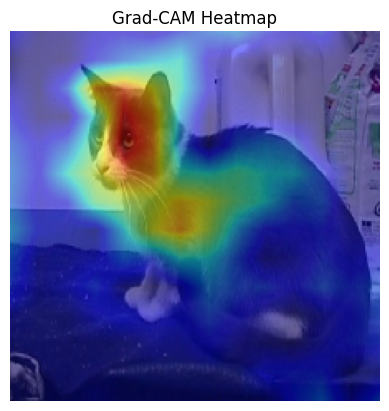

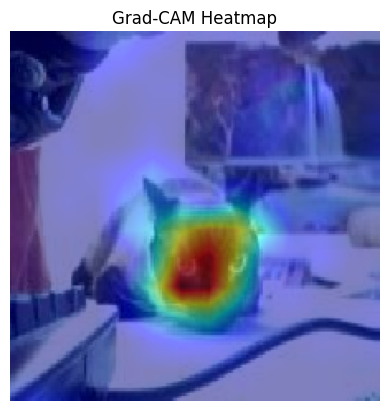

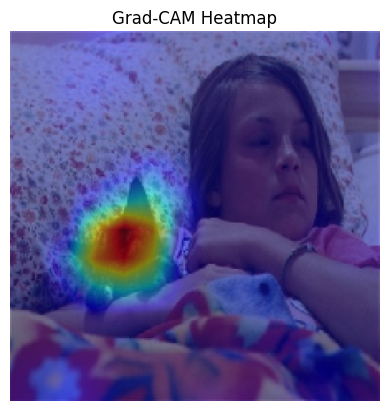

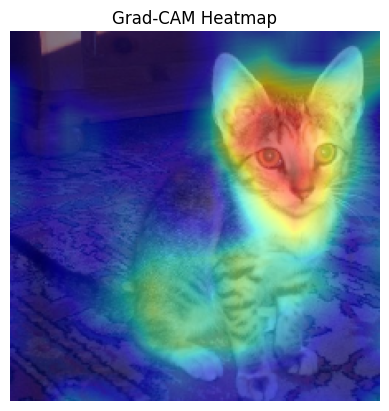

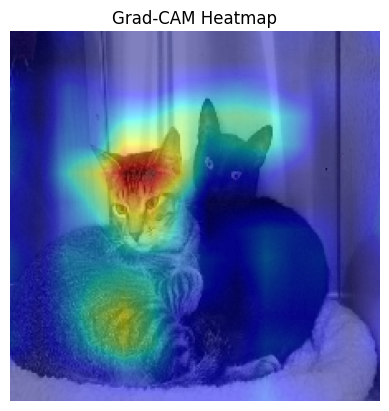

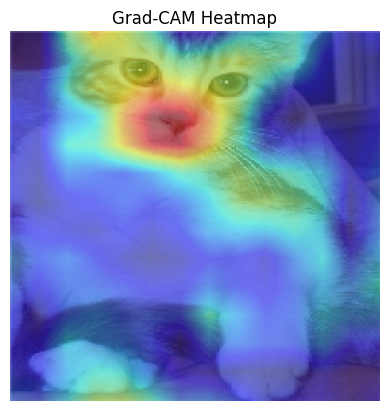

In [20]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
#from tf_keras_vis.utils import utils
from tf_keras_vis.utils.scores import CategoricalScore
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear

# Load the model (e.g., VGG16)
model = VGG16(weights='imagenet')

# Load and preprocess the image
data_dir = "/content/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages"

# Check if the file exists to verify the path
for num in range (0,10) :
  img_path = os.path.join(data_dir, 'Cat', f'{num}.jpg')
  img = image.load_img(img_path, target_size=(224, 224))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
  img_array = preprocess_input(img_array)  # Preprocess input for VGG16

  score = CategoricalScore(281)

  gradcam = Gradcam(model, model_modifier=ReplaceToLinear())

# Generate the heatmap
  heatmap = gradcam(score, img_array, penultimate_layer="block5_conv3")  # Specify the layer name

# Normalize the heatmap for visualization
  heatmap = np.squeeze(heatmap)  # Remove batch dimension
  heatmap = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min())  # Normalize between 0 and 1

# Overlay the heatmap on the original image
  img = image.load_img(img_path, target_size=(224, 224))
  plt.imshow(img)
  plt.imshow(heatmap, cmap='jet', alpha=0.5)  # Overlay the heatmap
  plt.title('Grad-CAM Heatmap')
  plt.axis('off')
  plt.show()
